# Customer Relationship Management (CRM) Analysis

## 1. Introduction
*Customer Relationship Management (CRM) analysis involves the systematic examination and interpretation of data related to interactions between a business and its customers. Through CRM analysis, companies evaluate customer behavior, preferences, and feedback to gain valuable insights into their needs and expectations.*

---

## 2. Objectives
- Uncover insights into customer behavior and purchasing patterns.
- Segment customers using RFM analysis.
- Identify patterns like peak shopping times to enhance marketing strategies.
- Assess customer lifetime value and churn rates for better retention strategies.

---

## 3. Data Loading and Overview


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set plot style
sns.set(style='whitegrid')

In [3]:
data = pd.read_csv('/content/Ecom_CRM_analysis.csv' , encoding='ISO-8859-1')

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [7]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

## 4. Data Cleaning

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [9]:
missing_customer_invoices = data['CustomerID'].isna()

unique_ids = (data.loc[missing_customer_invoices, 'InvoiceNo'].factorize()[0] + 1000)

new_customer_ids = ['Unknown Customer ' + str(id) for id in unique_ids]

data.loc[missing_customer_invoices, 'CustomerID'] = new_customer_ids

In [10]:
data['CustomerID'].nunique()

8082

In [11]:
stock_description_map = data.dropna(subset=['Description']).groupby('StockCode')['Description'].first()
data['Description'].fillna(data['StockCode'].map(stock_description_map),inplace = True)

In [12]:
data['Description'].isna().sum()

112

In [13]:
data['Description'] = data['Description'].fillna('Free Products')

In [14]:
# Checking for Duplicates

data.duplicated().sum()

5268

In [15]:
data.drop_duplicates(inplace = True)

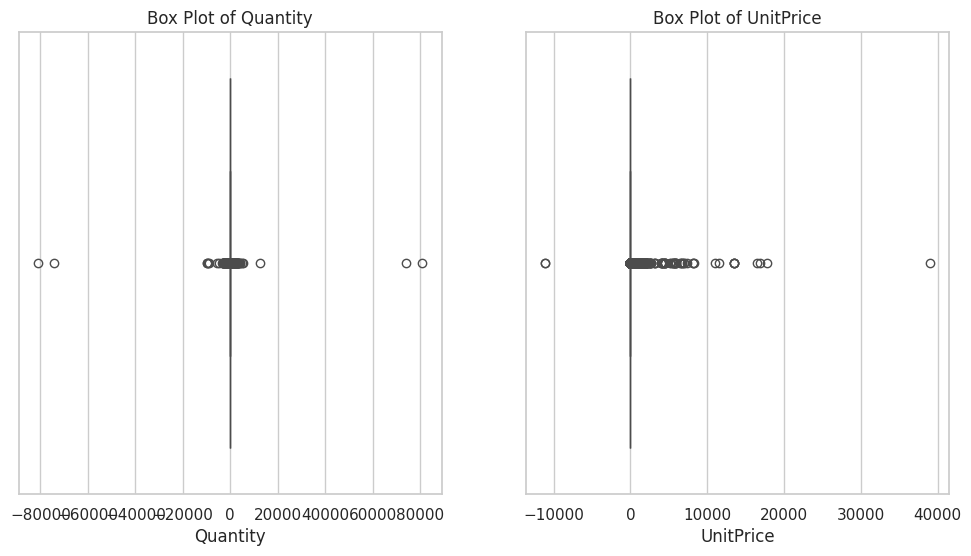

In [16]:
# Handling outliers

num_cols = ['Quantity', 'UnitPrice']
plt.figure(figsize=(12, 6))
for col in num_cols:
    plt.subplot(1, 2, num_cols.index(col) + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')

In [17]:
# Capping outliers based on the 1st and 99th percentiles
for col in num_cols:
    lower_cap = data[col].quantile(0.01)
    upper_cap = data[col].quantile(0.99)
    data[col] = np.where(data[col] < lower_cap, lower_cap, data[col])
    data[col] = np.where(data[col] > upper_cap, upper_cap, data[col])



In [18]:
data.shape

(536641, 8)

## 5. Explortory Data Analysis

In [19]:
# Basic Descriptive Statistics
numerical_cols = ['Quantity', 'UnitPrice']

descriptive_stats = data[numerical_cols].describe()
print(descriptive_stats)

            Quantity      UnitPrice
count  536641.000000  536641.000000
mean        8.655703       3.257499
std        15.299482       3.306374
min        -2.000000       0.190000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max       100.000000      18.000000


In [20]:
# Analyzing Sales
# Calculate total sales
data['Sales'] = data['Quantity'] * data['UnitPrice']


total_sales = data['Sales'].sum()

average_order_value = data['Sales'].sum() / data['InvoiceNo'].nunique()



print(f'Total Sales: ${total_sales:,.2f}')
print(f'Average Order Value: ${average_order_value:,.2f}')


Total Sales: $8,922,366.32
Average Order Value: $344.49


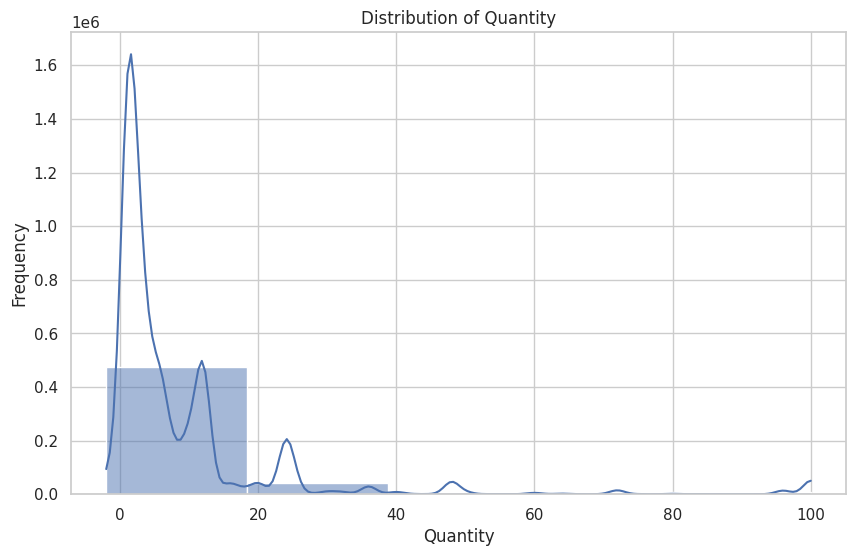

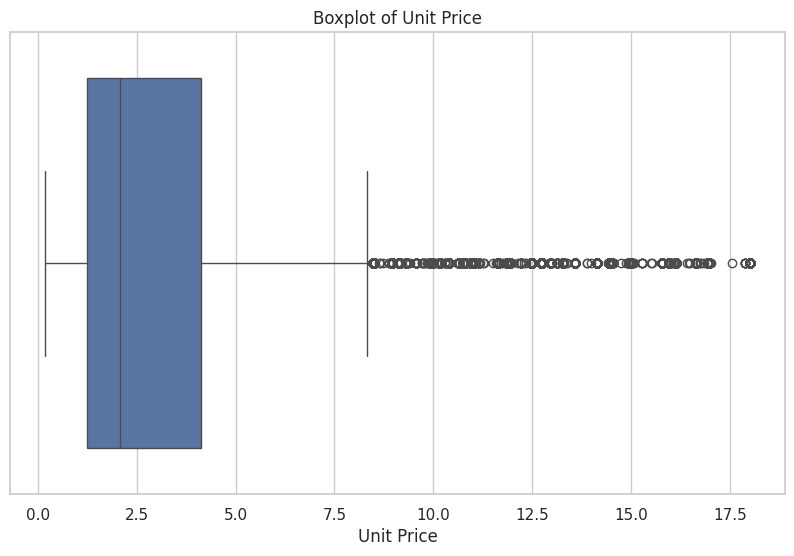

In [21]:
#Visualization

# Histogram of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(data['Quantity'], bins=5, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Unit Price
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['UnitPrice'])
plt.title('Boxplot of Unit Price')
plt.xlabel('Unit Price')
plt.show()


In [22]:
# Categorical Analysis

# Unique product count
unique_products = data['Description'].nunique()
print(f'Unique Products Sold: {unique_products}')

# Count of transactions per product
product_counts = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(product_counts.head(10))  # Top 10 products by quantity sold


Unique Products Sold: 4224
Description
JUMBO BAG RED RETROSPOT               37776.0
ASSORTED COLOUR BIRD ORNAMENT         28363.0
WHITE HANGING HEART T-LIGHT HOLDER    28209.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS     27817.0
PACK OF 72 RETROSPOT CAKE CASES       26599.0
VICTORIAN GLASS HANGING T-LIGHT       20803.0
POPCORN HOLDER                        20697.0
RABBIT NIGHT LIGHT                    19058.0
LUNCH BAG RED RETROSPOT               18816.0
PARTY BUNTING                         17520.0
Name: Quantity, dtype: float64


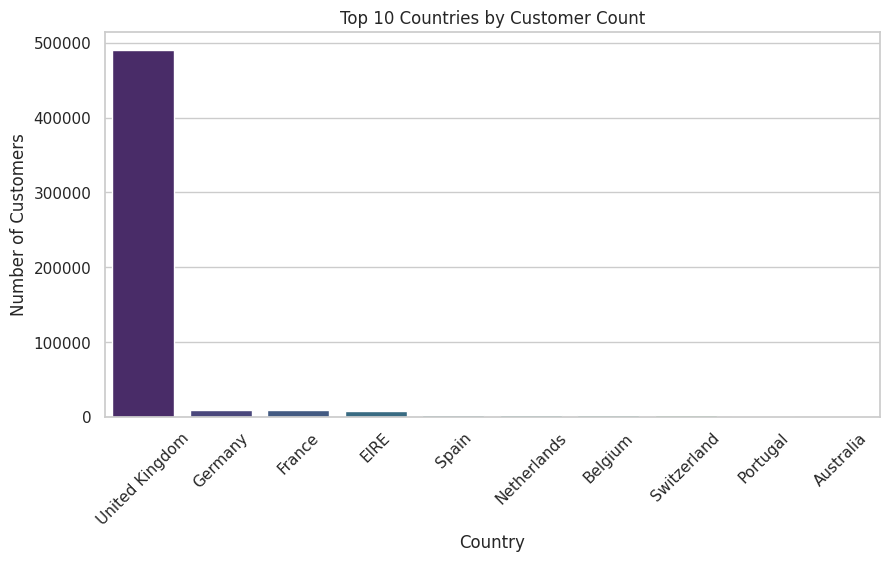

In [23]:
# Top 10 countries

top_countries = data['Country'].value_counts().head(10)


plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Customer Count')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.savefig('top_countries.png')
plt.show()

In [24]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


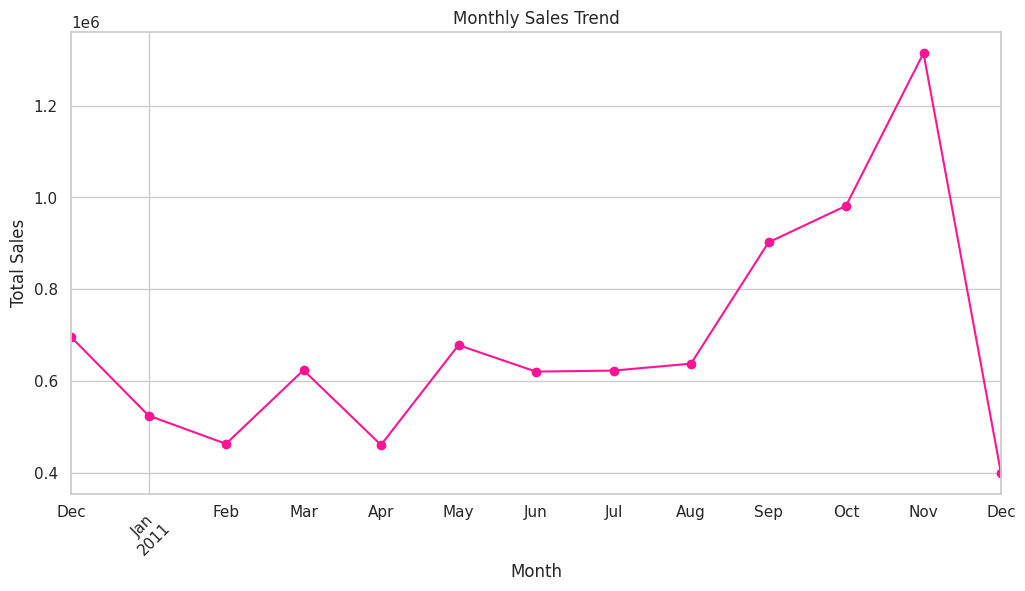

In [25]:
# Sales Trend by month
data['Month'] = data['InvoiceDate'].dt.to_period('M')
monthly_sales = data.groupby('Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker = 'o', color='deeppink')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('monthly_sales.png')
plt.show()


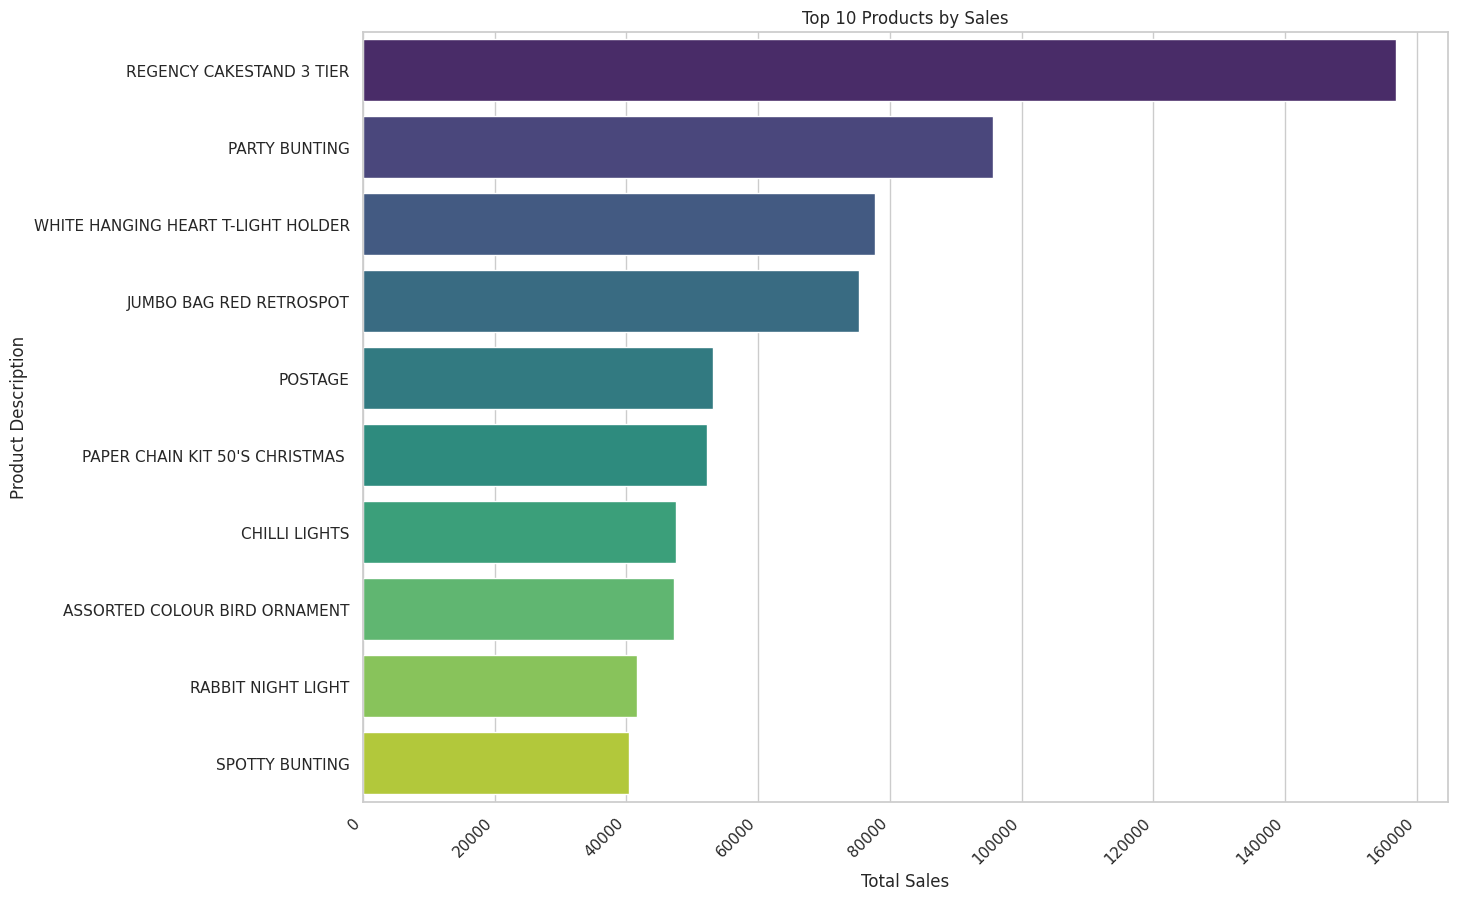

In [26]:
# Top Products by sales

products = data.groupby(['StockCode', 'Description'])['Sales'].sum().reset_index()
top_products = products.sort_values(by='Sales', ascending=False).head(10)


plt.figure(figsize=(14, 10))
sns.barplot(x='Sales', y='Description', data=top_products , palette='viridis')
plt.xticks(rotation=45 , ha='right')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.savefig('top_products.png')
plt.show()

## 6. Feature Engineering

In [27]:
data['Year']  = data['InvoiceDate'].dt.year
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()


data['IsCancelled'] = data['InvoiceNo'].apply(lambda x: 1 if str(x).startswith('C') else 0 )

## 7.RFM analysis

In [28]:
now = data['InvoiceDate'].max() + timedelta(days=1)

In [29]:
# Calculate Recency, Frequency, and Monetary (RFM) for each customer
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency: days since last purchase
    'InvoiceNo': 'nunique',  # Frequency: number of unique transactions (invoices)
    'Sales': 'sum'  # Monetary: total spending (sum of Sales)
}).reset_index()



In [30]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [31]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,101.92
1,12347.0,2,7,4164.40
2,12348.0,75,4,1464.08
3,12349.0,19,1,1453.60
4,12350.0,310,1,312.40


In [32]:
rfm['R'] = pd.qcut(rfm['Recency'], 3, labels=[3, 2, 1])

# Frequency (Higher is better, drop duplicate bin edges)
frequency_bins = pd.qcut(rfm['Frequency'].rank(method='first'), q=3, labels=[1, 2, 3])  # Using rank to avoid issues
rfm['F'] = frequency_bins

# Monetary (Higher is better)
rfm['M'] = pd.qcut(rfm['Monetary'], 3, labels=[1, 2, 3])

In [33]:
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)


In [34]:
def segment_customer(rfm):
    if rfm['RFM_Score'] == '333':
        return 'Champion'
    elif rfm['RFM_Score'].startswith('3'):
        return 'Loyal Customer'
    elif rfm['RFM_Score'][1] == '3':
        return 'Potential Loyalist'
    elif rfm['RFM_Score'][2] == '3':
        return 'Big Spender'
    elif rfm['RFM_Score'] in ['111']:
        return 'Churned'
    elif rfm['RFM_Score'][0] == '1' and rfm['RFM_Score'][1] == '1':
        return 'Lost'
    elif rfm['RFM_Score'] == '221':
        return 'New Customers'  # Recently purchased but low frequency
    elif rfm['RFM_Score'] == '322':
        return 'At Risk'  # High Recency, Medium Frequency, High Monetary
    elif rfm['RFM_Score'] == '231':
        return 'Promising'  # Medium Recency, High Frequency, Low Monetary
    elif rfm['RFM_Score'] == '312':
        return 'Potential Loyalist - Medium Frequency'  # High Recency, Medium Frequency
    elif rfm['RFM_Score'][0] == '2' and rfm['RFM_Score'][1] == '1':
        return 'Low Recency - Low Frequency'  # Customers with lower engagement but could still have potential
    elif rfm['RFM_Score'][0] == '3' and rfm['RFM_Score'][1] == '2':
        return 'Occasional Customers'  # High Recency, Medium Frequency
    else:
        return 'Other'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)

In [35]:
rfm.describe()

,Recency,Frequency,Monetary
count,8082.000000,8082.000000,8082.000000
mean,133.116803,3.204652,1103.979995
std,114.035982,7.162265,4530.203088
min,1.000000,1.000000,-228.420000
25%,29.000000,1.000000,2.100000
50%,97.000000,1.000000,281.525000
75%,228.000000,3.000000,1035.257500
max,374.000000,248.000000,212897.000000


In [36]:
segment_counts = rfm['Segment'].value_counts()

In [37]:
segment_counts

,count
Segment,
Champion,1370
Loyal Customer,1324
Potential Loyalist,998
Churned,996
New Customers,932
Other,722
Lost,695
Big Spender,625
Low Recency - Low Frequency,420


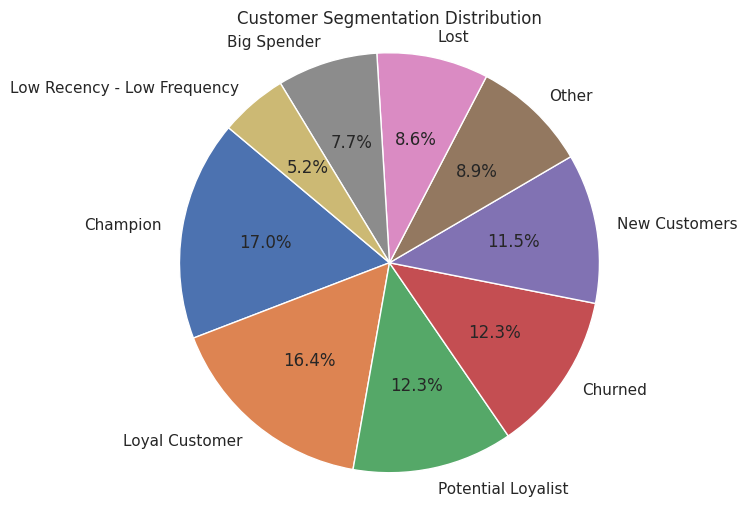

In [38]:
plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Segmentation Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('customer_segmentation.png')
plt.show()

In [61]:
df = pd.merge(data, rfm , on='CustomerID' , how='inner')
df= df.drop_duplicates(subset = 'CustomerID' , keep= 'first')

In [62]:
df.shape

(8082, 21)

## 8. Churned Customer Analysis


In [63]:
Churn_threshold_date = now - pd.DateOffset(months=6)

In [64]:
unique_customers = df['CustomerID'].nunique()


churned_customers = df[df['Recency'] > (now - Churn_threshold_date).days]
churn_rate = len(churned_customers) / unique_customers * 100


In [65]:
print(churned_customers)
print(churn_rate)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
65        536374     21258           VICTORIAN SEWING BOX LARGE      32.0   
155       536384     82484    WOOD BLACK BOARD ANT WHITE FINISH       3.0   
183       536388     21754             HOME BUILDING BLOCK WORD       3.0   
235      C536391     22556       PLASTERS IN TIN CIRCUS PARADE       -2.0   
...          ...       ...                                  ...       ...   
218294    556124    17007B  S/3 POT POURI CUSHIONS BLUE COLOURS      -2.0   
218436    556180     22502           PICNIC BASKET WICKER SMALL      40.0   
218507    556186     22089        PAPER BUNTING VINTAGE PAISLEY       6.0   
218532    556188     22439                   6 ROCKET BALLOONS       20.0   
218722    556200    84796B    BLUE SAVANNAH PICNIC HAMPER FOR 2      17.0   

               InvoiceDate  UnitPrice             CustomerID         Countr

In [66]:
churned_value = df[df['Segment'] == 'Churned']
churned_by_country = churned_value.groupby('Country')['CustomerID'].count().reset_index()
churned_by_country

,Country,CustomerID
0,Bahrain,1
1,EIRE,4
2,Germany,1
3,Hong Kong,2
4,Israel,1
5,Italy,1
6,Spain,1
7,United Kingdom,985


## 7.   Customer Lifetime Value

In [70]:
df['Avg_order_value'] = df['Monetary'] / df['Frequency']
df['CLV'] = df['Avg_order_value'] * df['Frequency'] * customer_lifespan

df[['CustomerID' , 'CLV']].head()

,CustomerID,CLV
0,17850.0,1026.440131
9,13047.0,628.030937
26,12583.0,1460.754268
46,13748.0,193.162724
65,15100.0,165.061698


In [71]:
high_treshold = df['CLV'].quantile(0.75)
low_treshold = df['CLV'].quantile(0.25)

In [73]:
def clv_category(value):
  if value >= high_treshold:
    return 'High'
  elif value <= low_treshold:
    return 'Low'
  else:
    return 'Medium'

df['CLV_Category'] = df['CLV'].apply(clv_category)
clv_counts = df['CLV_Category'].value_counts()

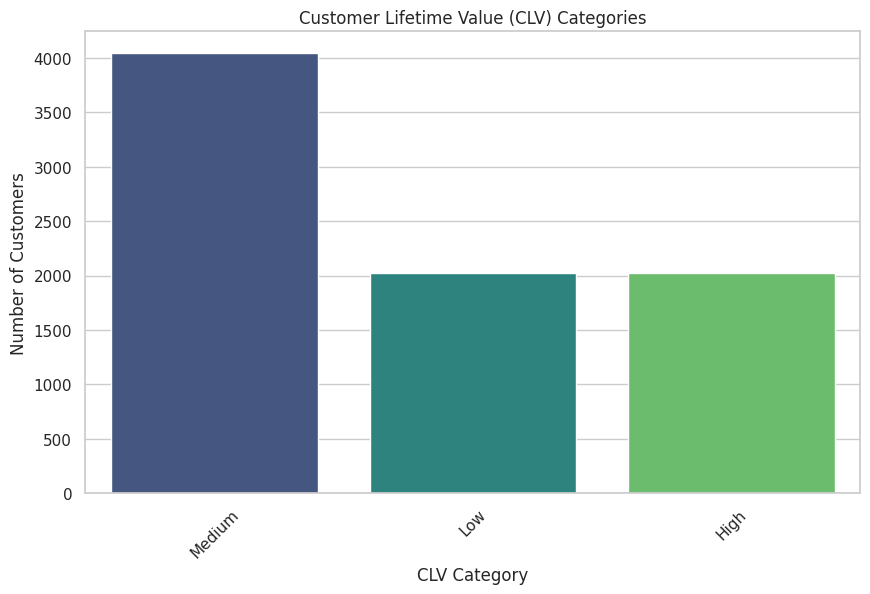

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x=clv_counts.index, y=clv_counts.values, palette='viridis')
plt.title('Customer Lifetime Value (CLV) Categories')
plt.xlabel('CLV Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.savefig('customer_lifetime_value.png')
plt.show()

## 9. Inventory Analysis


In [78]:
# Top Selling Products
product_sales = df.groupby('StockCode').agg({
    'Description': 'first',
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()


top_selling_products = product_sales.sort_values(by='Sales', ascending=False)

print(top_selling_products.head(10))

     StockCode                         Description    Sales  Quantity
1026     22423            REGENCY CAKESTAND 3 TIER  5840.51     517.0
2467    85123A  WHITE HANGING HEART T-LIGHT HOLDER  3403.41    1375.0
2060     79321                       CHILLI LIGHTS  2448.01     635.0
802      22086     PAPER CHAIN KIT 50'S CHRISTMAS   1957.93     735.0
1935     47566                       PARTY BUNTING  1531.80     334.0
2451    85099B             JUMBO BAG RED RETROSPOT  1285.99     713.0
16     15056BL             EDWARDIAN PARASOL BLACK  1260.46     241.0
1648     23284       DOORMAT KEEP CALM AND COME IN  1187.69     181.0
2452    85099C      JUMBO  BAG BAROQUE BLACK WHITE  1180.49     665.0
1085     22502          PICNIC BASKET WICKER SMALL  1096.81     287.0


In [80]:
# Product Returns

returned_products = data[data['Quantity'] < 0]


product_returns = returned_products.groupby('StockCode').agg({
    'Description': 'first',
    'Quantity': 'sum',
    'Sales': 'sum'
}).reset_index()


most_returned_products = product_returns.sort_values(by='Quantity', ascending=True)


print(most_returned_products.head(10))



     StockCode                        Description  Quantity    Sales
2556         M                             Manual    -291.0 -3328.68
944      22423           REGENCY CAKESTAND 3 TIER    -275.0 -3178.89
2557      POST                            POSTAGE    -140.0 -1732.35
1357     22960           JAM MAKING SET WITH JARS    -135.0  -563.79
1178     22720  SET OF 3 CAKE TINS PANTRY DESIGN     -110.0  -519.86
291      21232     STRAWBERRY CERAMIC TRINKET BOX     -99.0  -119.76
2542         D                           Discount     -82.0 -1154.63
795      22197               SMALL POPCORN HOLDER     -82.0   -66.45
1164     22699   ROSES REGENCY TEACUP AND SAUCER      -77.0  -223.15
1133     22666    RECIPE BOX PANTRY YELLOW DESIGN     -71.0  -206.25


In [81]:
# Inventory Turnover


inventory_turnover = product_sales[['StockCode', 'Description', 'Quantity']].copy()

inventory_turnover = inventory_turnover.sort_values(by='Quantity', ascending=False)

print(inventory_turnover.head(10))




     StockCode                         Description  Quantity
2467    85123A  WHITE HANGING HEART T-LIGHT HOLDER    1375.0
11       15036           ASSORTED COLOURS SILK FAN     843.0
802      22086     PAPER CHAIN KIT 50'S CHRISTMAS      735.0
125      20713                      JUMBO BAG OWLS     718.0
2451    85099B             JUMBO BAG RED RETROSPOT     713.0
2452    85099C      JUMBO  BAG BAROQUE BLACK WHITE     665.0
2060     79321                       CHILLI LIGHTS     635.0
1531     23084                  RABBIT NIGHT LIGHT     620.0
2350     84946     ANTIQUE SILVER TEA GLASS ETCHED     616.0
886      22197                SMALL POPCORN HOLDER     596.0


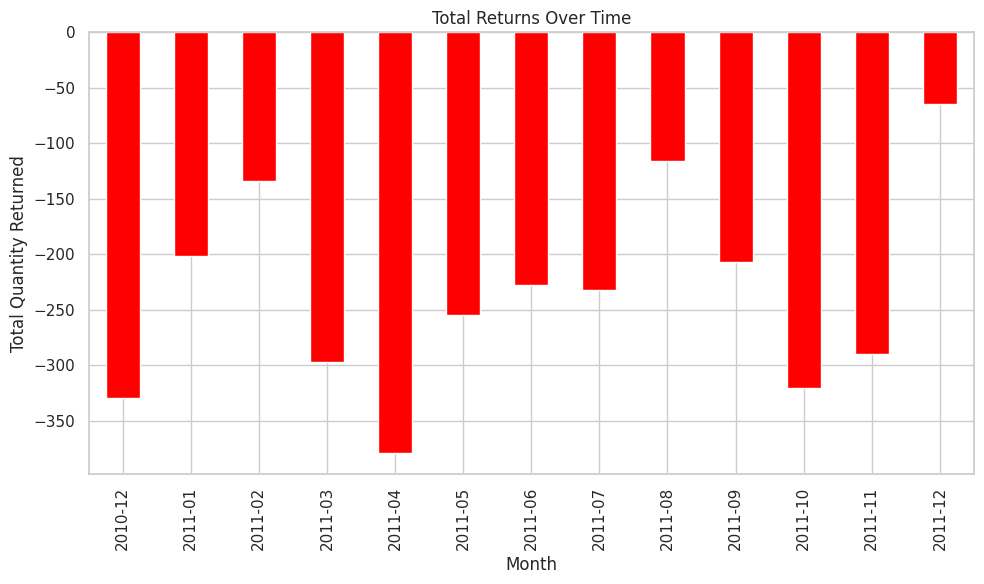

In [85]:

returned_data = df[df['Quantity'] < 0]


monthly_returns = returned_data.groupby(returned_data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

# Plot total returns over time
plt.figure(figsize=(10, 6))
monthly_returns.plot(kind='bar', color='red')
plt.title('Total Returns Over Time')
plt.xlabel('Month')
plt.ylabel('Total Quantity Returned')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


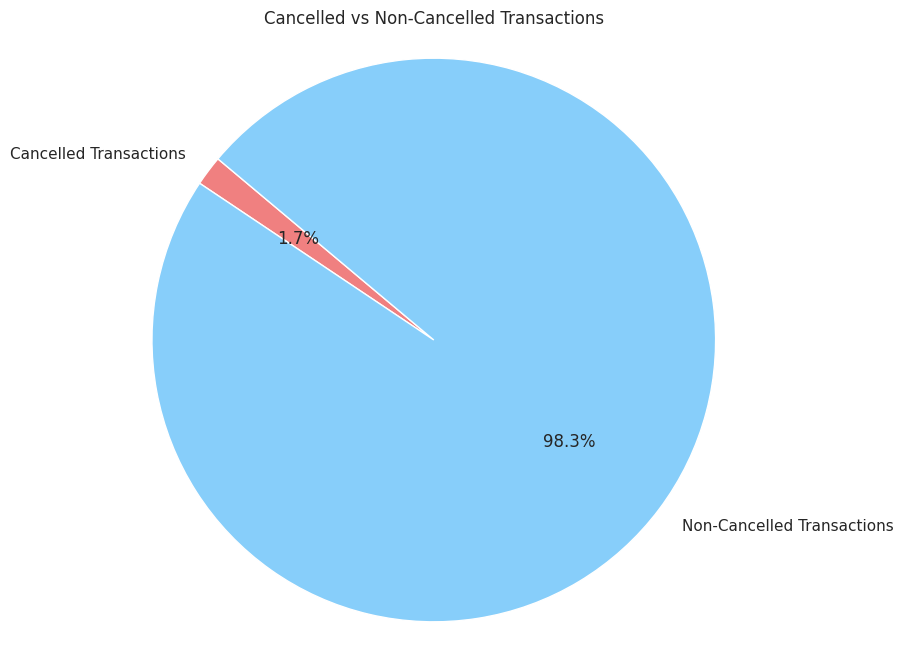

In [86]:
# Cancelled Transactions and Customers


cancelled_count = data['IsCancelled'].sum()
non_cancelled_count = len(data) - cancelled_count

# Plot a pie chart
plt.figure(figsize=(8, 8))
labels = ['Cancelled Transactions', 'Non-Cancelled Transactions']
sizes = [cancelled_count, non_cancelled_count]
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Cancelled vs Non-Cancelled Transactions')
plt.show()


## Insights

**Total Sales and Performance:**

Total Sales amount to $8.92 million, with an Average Order Value (AOV) of $344.49. The dataset reveals that a significant portion of the sales comes from a few top-selling products, indicating potential for focused inventory management and sales strategy.

**Top-Selling Products:**

The products REGENCY CAKESTAND 3 TIER and WHITE HANGING HEART T-LIGHT HOLDER are among the highest-selling items, accounting for a considerable portion of revenue.
A small group of products drives a significant amount of the total sales, with high turnover rates.

**Returns and Cancellations:**

Returned Products and cancellations represent a notable share of the dataset:
The product REGENCY CAKESTAND 3 TIER has one of the highest sales but also shows high returns, indicating possible quality or customer satisfaction issues.
Around 13.3% of transactions are cancellations, highlighting issues such as order errors, shipping issues, or customer dissatisfaction.

**Customer Segmentation (RFM Analysis):**

RFM Segmentation reveals that a significant portion of customers are categorized as Champions or Loyal Customers. These are customers who have purchased frequently and recently and contribute the most to sales.
A large portion of the customer base is Potential Loyalists, meaning they have high potential but need more engagement to turn into loyal customers.
Approximately 33.6% of customers are churned, meaning they haven't made a purchase in over six months. This represents a significant portion of customers that can be re-engaged.

**Customer Lifetime Value (CLV) Distribution:**

Customers with high CLV (top 25%) are the most profitable, driving a large portion of the company's revenue. Retaining and increasing engagement with these customers is essential.
Low CLV customers make up the bottom 25%, meaning efforts should be made to either boost their spending or focus resources on more valuable customers.

**Geographic Insights:**

The United Kingdom dominates in terms of both customer count and sales, with the majority of customers and transactions originating from this region.
Churned customers are also mostly located in the UK, indicating that efforts to re-engage customers should be focused here.

**Inventory Analysis:**

High Inventory Turnover products like JUMBO BAG RED RETROSPOT and WHITE HANGING HEART T-LIGHT HOLDER sell quickly, indicating strong demand.
Product Returns and underperforming products indicate areas where inventory management can be optimized. Products with both high sales and high returns need closer examination to address potential quality issues.



## Recommendations:

**Target High-Value Customers (Champions and Loyal Customers):**

Implement a VIP program for high CLV customers, offering exclusive deals, early access to new products, or free shipping. These customers represent the most profitable segment, so retaining them should be a priority.
Provide personalized recommendations and targeted email marketing campaigns to maintain their engagement.

**Re-Engage Churned and At-Risk Customers:**

Develop a win-back campaign offering discounts or incentives for churned customers, especially focusing on customers in the UK, where churn is highest.
For Potential Loyalists and At-Risk customers, offer special promotions or cross-sell opportunities to encourage frequent purchases and prevent churn.

**Reduce Product Returns and Improve Product Descriptions:**

Investigate why products like REGENCY CAKESTAND 3 TIER are highly returned despite being top sellers. Ensure product descriptions are accurate, and look into any possible quality control issues.
Consider improving packaging, providing clearer product descriptions, or offering better pre-purchase information to reduce return rates.

**Optimize Inventory Management:**

Prioritize inventory for high-selling products like JUMBO BAG RED RETROSPOT and WHITE HANGING HEART T-LIGHT HOLDER to avoid stockouts during peak periods. Use insights from sales trends to ensure these products are always available.
For underperforming products (low sales but occupying inventory space), consider bundling them with better-performing items, offering discounts, or discontinuing them.

**Focus on High CLV Customers:**

High CLV customers are critical for long-term profitability. Invest in loyalty programs, personalized communication, and exclusive offers to increase their lifetime value.
For low CLV customers, test strategies like upselling or cross-selling to increase their purchase frequency or average order value.

**Geographic Expansion and Regional Marketing:**

Given that the majority of sales come from the UK, it's essential to continue focusing on this region while exploring opportunities for geographic expansion.
Tailor marketing campaigns for regions with growth potential or target loyal customers in the UK with exclusive offers to strengthen relationships.

**Customer Experience Improvements:**

The high rate of cancellations indicates that there may be issues with customer experience (e.g., order handling or delivery). Investigate the root causes of cancellations and aim to improve the order and delivery process.
Provide better pre-purchase information or customer support to reduce cancellations and returns.
